In [5]:
# Make sure you have mplcursors installed 
# import mplcursors
# print("mplcursors is installed correctly!")

# it not install it using the following command.
# pip install mplcursors

mplcursors is installed correctly!


In [2]:
import numpy as np
import pandas as pd
import os
import sqlite3
import matplotlib.pyplot as plt
# mplcursors is a library that allows us to make interactive plots in Matplotlib, however this is not currently working correctly. 
import mplcursors
import pathlib as path

In [2]:
# Load the csv FastFoodNutritionMenuV2 from the resources folder. 
csv_path = ('../resources/FastFoodNutritionMenuV2.csv')
fastfooddata = pd.read_csv(csv_path)

# display the first 5 rows of the data
fastfooddata.head()


,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [3]:
# Cleaning the column names: 
fastfooddata.columns = fastfooddata.columns.str.replace('\n', ' ').str.strip()

# Display the columns
fastfooddata.head()

,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [4]:
# Debug: Print the number of entries for each company
print(fastfooddata['Company'].value_counts())

Company
McDonald’s     329
KFC            218
Burger King    190
Taco Bell      183
Wendy’s        154
Pizza Hut       74
Name: count, dtype: int64


In [5]:
# Convert relevant columns to numeric, forcing errors to NaN
fastfooddata['Sugars (g)'] = pd.to_numeric(fastfooddata['Sugars (g)'], errors='coerce')
fastfooddata['Calories'] = pd.to_numeric(fastfooddata['Calories'], errors='coerce')

In [6]:
# Debug: Print the number of entries for each company
print(fastfooddata['Company'].value_counts())

Company
McDonald’s     329
KFC            218
Burger King    190
Taco Bell      183
Wendy’s        154
Pizza Hut       74
Name: count, dtype: int64


In [7]:
# Check for missing values in the dataset
missing_values = fastfooddata.isnull().sum()
print("\nMissing values in each column:\n", missing_values)

# Display the first few rows of the dataset to understand its structure
print("\nFirst few rows of the dataset:\n", fastfooddata.head())


Missing values in each column:
 Company                   0
Item                      0
Calories                 15
Calories from Fat       506
Total Fat (g)            57
Saturated Fat (g)        57
Trans Fat (g)            57
Cholesterol (mg)          1
Sodium  (mg)              1
Carbs (g)                57
Fiber (g)                57
Sugars (g)               30
Protein (g)              57
Weight Watchers Pnts    261
dtype: int64

First few rows of the dataset:
       Company                           Item  Calories Calories from Fat  \
0  McDonald’s                      Hamburger     250.0                80   
1  McDonald’s                   Cheeseburger     300.0               110   
2  McDonald’s            Double Cheeseburger     440.0               210   
3  McDonald’s                       McDouble     390.0               170   
4  McDonald’s   Quarter Pounder® with Cheese     510.0               230   

  Total Fat (g) Saturated Fat (g) Trans Fat (g) Cholesterol (mg) Sodium 

In [8]:
# list columns in the dataset
print("\nColumns in the dataset:\n", fastfooddata.columns)


Columns in the dataset:
 Index(['Company', 'Item', 'Calories', 'Calories from Fat', 'Total Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)',
       'Sodium  (mg)', 'Carbs (g)', 'Fiber (g)', 'Sugars (g)', 'Protein (g)',
       'Weight Watchers Pnts'],
      dtype='object')


In [9]:
# Cleaning the data. We have a lot of missing data from Calories from Fat and Weight watchers points.
cleaned_df = fastfooddata.drop(columns=['Calories from Fat', 'Weight Watchers Pnts'])
print("\nFirst few rows of the cleaned dataset:\n", cleaned_df.head())


First few rows of the cleaned dataset:
       Company                           Item  Calories Total Fat (g)  \
0  McDonald’s                      Hamburger     250.0             9   
1  McDonald’s                   Cheeseburger     300.0            12   
2  McDonald’s            Double Cheeseburger     440.0            23   
3  McDonald’s                       McDouble     390.0            19   
4  McDonald’s   Quarter Pounder® with Cheese     510.0            26   

  Saturated Fat (g) Trans Fat (g) Cholesterol (mg) Sodium  (mg) Carbs (g)  \
0               3.5           0.5               25          520        31   
1                 6           0.5               40          750        33   
2                11           1.5               80         1150        34   
3                 8             1               65          920        33   
4                12           1.5               90         1190        40   

  Fiber (g)  Sugars (g) Protein (g)  
0         2         6.0  

In [10]:
# Debug: Print the number of entries for each company
print(cleaned_df['Company'].value_counts())

Company
McDonald’s     329
KFC            218
Burger King    190
Taco Bell      183
Wendy’s        154
Pizza Hut       74
Name: count, dtype: int64


In [11]:
# Check the new missing values in the cleaned dataset
missing_values_cleaned = cleaned_df.isnull().sum()
print("\nMissing values in each column of the cleaned dataset:\n", missing_values_cleaned)


Missing values in each column of the cleaned dataset:
 Company               0
Item                  0
Calories             15
Total Fat (g)        57
Saturated Fat (g)    57
Trans Fat (g)        57
Cholesterol (mg)      1
Sodium  (mg)          1
Carbs (g)            57
Fiber (g)            57
Sugars (g)           30
Protein (g)          57
dtype: int64


In [12]:
# Drop rows with missing values from the cleaned dataset
cleaned_df = cleaned_df.dropna()
print("\nFirst few rows of the cleaned dataset after dropping missing values:\n", cleaned_df.head())



First few rows of the cleaned dataset after dropping missing values:
       Company                           Item  Calories Total Fat (g)  \
0  McDonald’s                      Hamburger     250.0             9   
1  McDonald’s                   Cheeseburger     300.0            12   
2  McDonald’s            Double Cheeseburger     440.0            23   
3  McDonald’s                       McDouble     390.0            19   
4  McDonald’s   Quarter Pounder® with Cheese     510.0            26   

  Saturated Fat (g) Trans Fat (g) Cholesterol (mg) Sodium  (mg) Carbs (g)  \
0               3.5           0.5               25          520        31   
1                 6           0.5               40          750        33   
2                11           1.5               80         1150        34   
3                 8             1               65          920        33   
4                12           1.5               90         1190        40   

  Fiber (g)  Sugars (g) Protein (

In [13]:
missing_values_cleaned = cleaned_df.isnull().sum()
print("\nMissing values in each column of the cleaned dataset:\n", missing_values_cleaned)


Missing values in each column of the cleaned dataset:
 Company              0
Item                 0
Calories             0
Total Fat (g)        0
Saturated Fat (g)    0
Trans Fat (g)        0
Cholesterol (mg)     0
Sodium  (mg)         0
Carbs (g)            0
Fiber (g)            0
Sugars (g)           0
Protein (g)          0
dtype: int64


In [14]:
# Debug: Print the number of entries for each company
print(cleaned_df['Company'].value_counts())

Company
McDonald’s     328
KFC            218
Burger King    179
Wendy’s        154
Taco Bell      118
Pizza Hut       67
Name: count, dtype: int64


In [15]:
# Our working cleaned dataset is now ready for analysis under the use name of "cleaned_df"
cleaned_df.head()

,Company,Item,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g)
0,McDonald’s,Hamburger,250.0,9,3.5,0.5,25,520,31,2,6.0,12
1,McDonald’s,Cheeseburger,300.0,12,6,0.5,40,750,33,2,6.0,15
2,McDonald’s,Double Cheeseburger,440.0,23,11,1.5,80,1150,34,2,7.0,25
3,McDonald’s,McDouble,390.0,19,8,1,65,920,33,2,7.0,22
4,McDonald’s,Quarter Pounder® with Cheese,510.0,26,12,1.5,90,1190,40,3,9.0,29


In [16]:
# Export the Cleaned_df to a new csv file in the Resources folder
cleaned_df.to_csv('../resources/Cleaned_FastFoodNutritionMenuV2.csv', index=False)

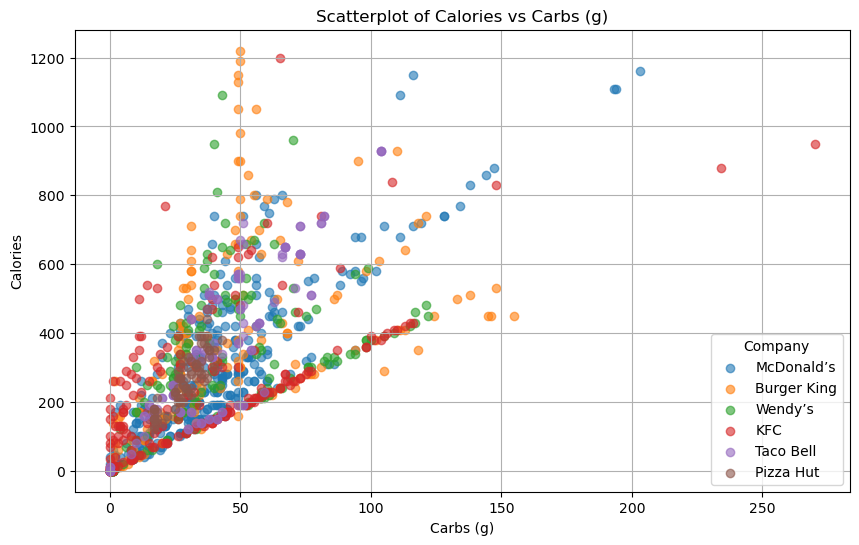

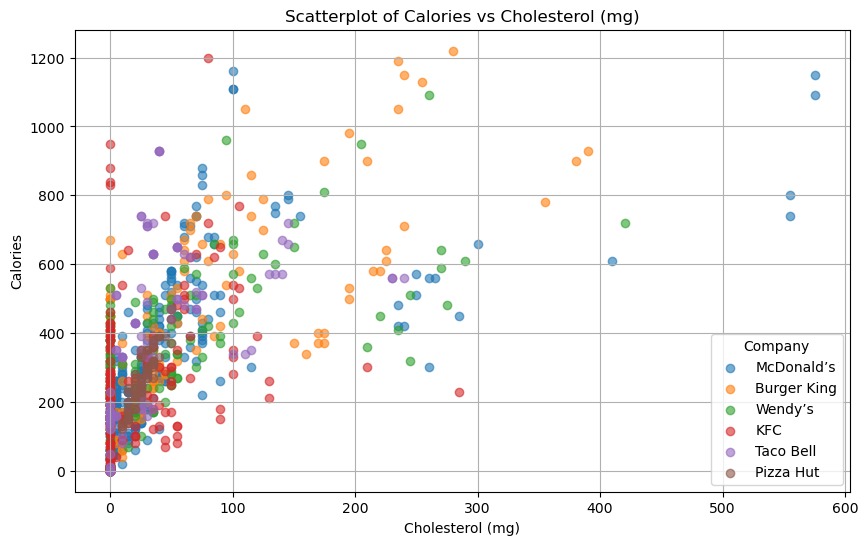

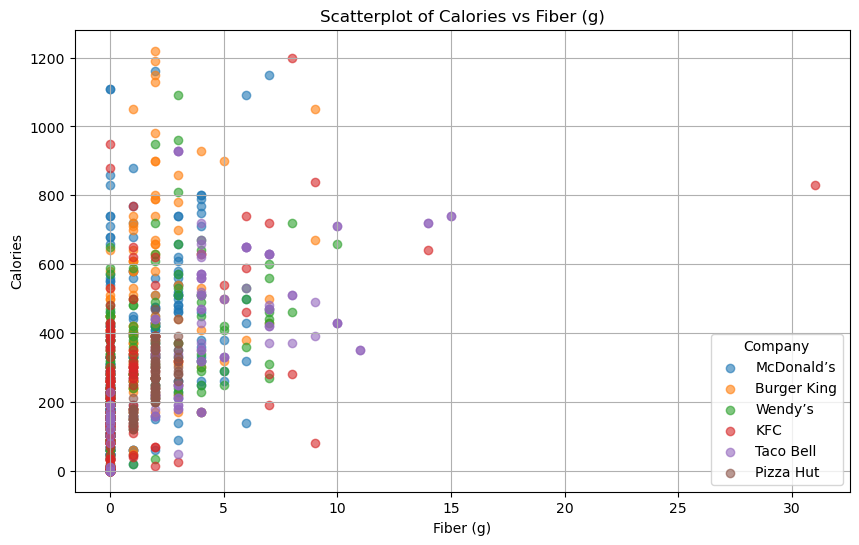

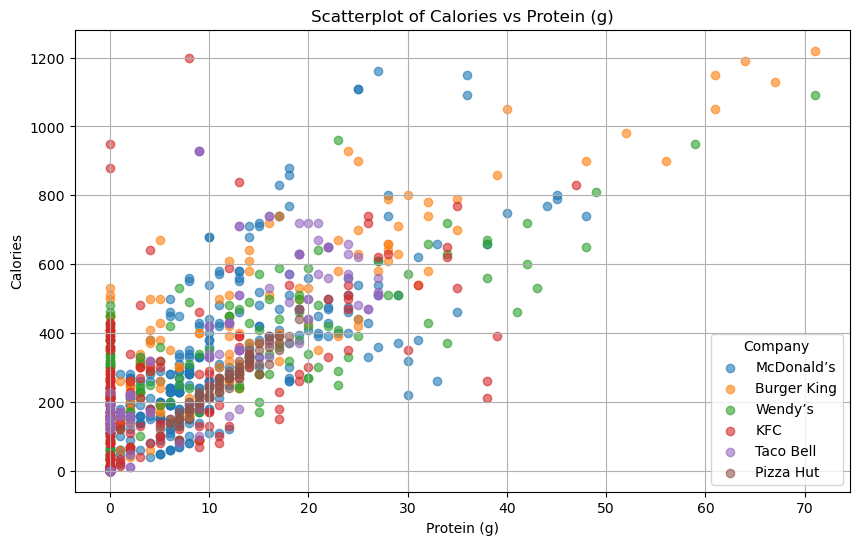

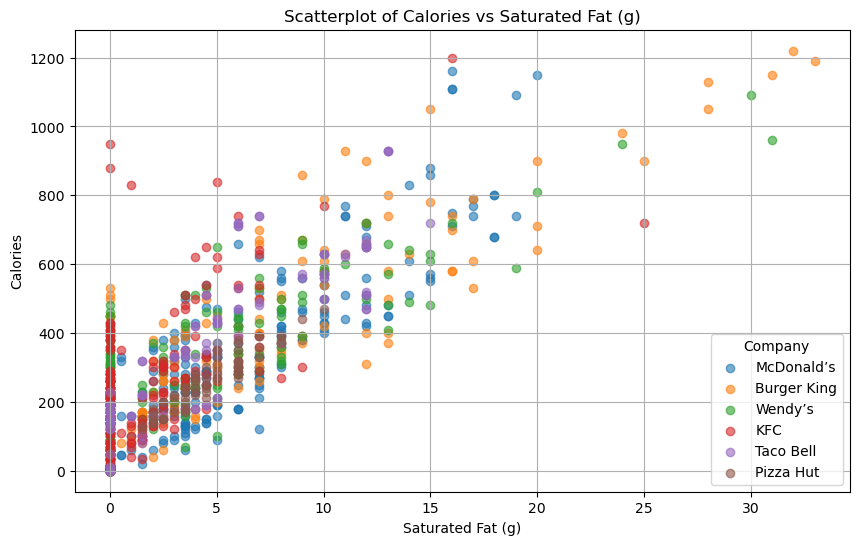

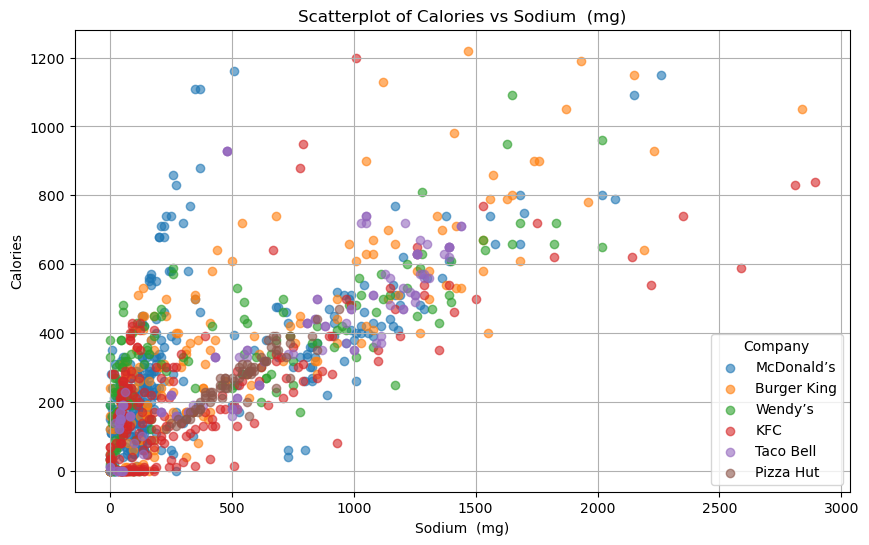

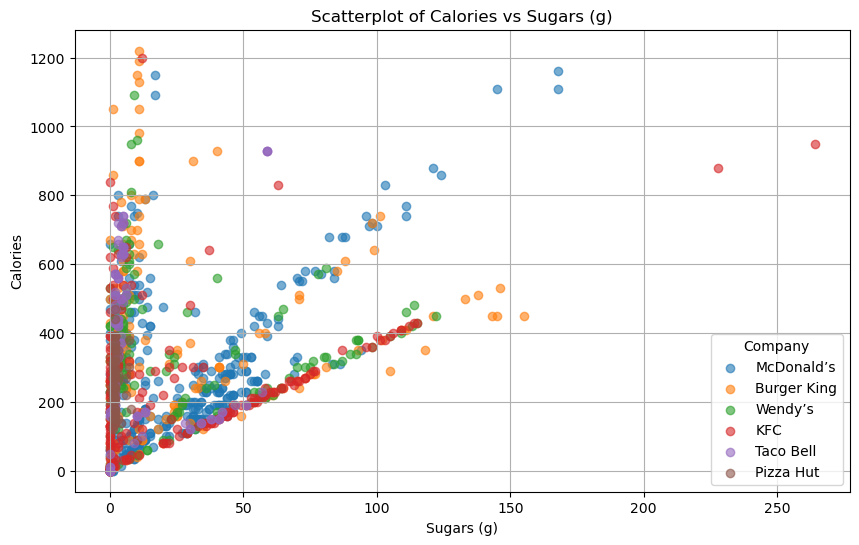

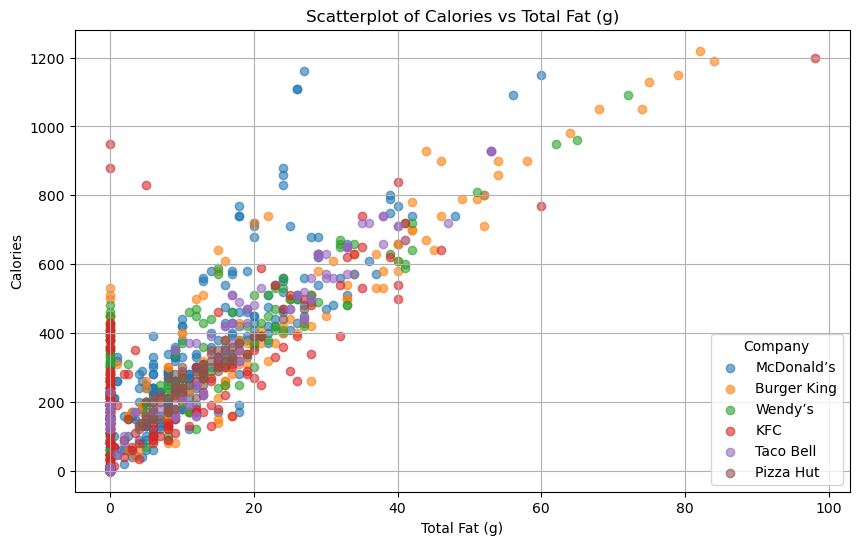

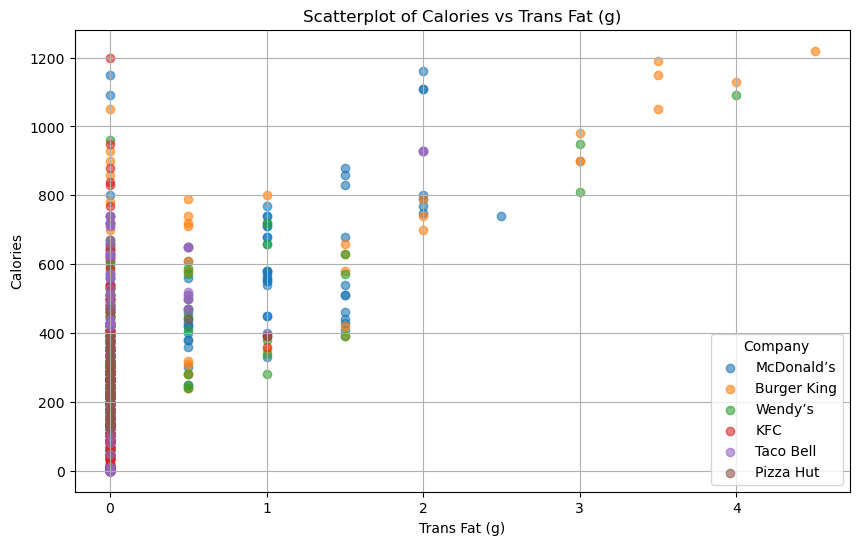

In [21]:
# Convert all relevant columns to numeric, forcing errors to NaN
for column in cleaned_df.columns[2:]:
    cleaned_df[column] = pd.to_numeric(cleaned_df[column], errors='coerce')

# List of categories to plot against Calories
categories = cleaned_df.columns.difference(['Company', 'Item', 'Calories'])

# Directory to save images
images_dir = os.path.join('..', 'Images')
os.makedirs(images_dir, exist_ok=True)

# Create scatterplots for each category against Calories
for category in categories:
    plt.figure(figsize=(10, 6))
    
    # Scatter plot
    for company in cleaned_df['Company'].unique():
        subset = cleaned_df[cleaned_df['Company'] == company]
        scatter = plt.scatter(subset[category], subset['Calories'], label=company, alpha=0.6)
    
    # Add title and labels
    plt.title(f'Scatterplot of Calories vs {category}')
    plt.xlabel(category)
    plt.ylabel('Calories')
    plt.legend(title='Company', loc='lower right')
    plt.grid(True)
    
    # Save the plot to the images directory
    filename = os.path.join(images_dir, f'Calories_vs_{category}.png')
    plt.savefig(filename, format='png')

    # Show the plot
    plt.show()

In [3]:
# Prevent extra DB creations. 
# Check to if the Fastfood.db file exists in the resources folder. If it does, delete it.
if os.path.exists('../resources/fastfood.db'):
    os.remove('../resources/fastfood.db')
else: 
    print("The file does not exist")

In [4]:
# import the new CSV file "Cleaned_FastFoodNutritionMenuV2" from the Resources folder into a sqlite database. 

# Create a connection to the sqlite database, and create the new .db file in the resources folder. 
conn = sqlite3.connect('../resources/fastfood.db')

# Use the newly created SQL Database connection to import the new CSV file into the database.
csv_file = '../resources/Cleaned_FastFoodNutritionMenuV2.csv'
cleanedfood = pd.read_csv(csv_file)

# Save the dataframe to an SQLite table named 'menu'
cleanedfood.to_sql('menu', conn, if_exists='replace', index=False)

# Display the first 5 rows of the data from the sqlite database
query = 'SELECT * FROM menu LIMIT 5'
result = pd.read_sql(query, conn)
print(result)

# Close the connection
conn.close()

      Company                           Item  Calories  Total Fat (g)  \
0  McDonald’s                      Hamburger     250.0            9.0   
1  McDonald’s                   Cheeseburger     300.0           12.0   
2  McDonald’s            Double Cheeseburger     440.0           23.0   
3  McDonald’s                       McDouble     390.0           19.0   
4  McDonald’s   Quarter Pounder® with Cheese     510.0           26.0   

  Saturated Fat (g)  Trans Fat (g) Cholesterol (mg)  Sodium  (mg) Carbs (g)  \
0               3.5            0.5               25           520        31   
1                 6            0.5               40           750        33   
2                11            1.5               80          1150        34   
3                 8            1.0               65           920        33   
4                12            1.5               90          1190        40   

  Fiber (g)  Sugars (g)  Protein (g)  
0         2         6.0           12  
1       

In [7]:
# Run a SQL query to find the list of columns in the database
conn = sqlite3.connect('../resources/fastfood.db')
query = 'PRAGMA table_info(menu)'
columns = pd.read_sql(query, conn)
print(columns)

    cid               name     type  notnull dflt_value  pk
0     0            Company     TEXT        0       None   0
1     1               Item     TEXT        0       None   0
2     2           Calories     REAL        0       None   0
3     3      Total Fat (g)     REAL        0       None   0
4     4  Saturated Fat (g)     TEXT        0       None   0
5     5      Trans Fat (g)     REAL        0       None   0
6     6   Cholesterol (mg)     TEXT        0       None   0
7     7       Sodium  (mg)  INTEGER        0       None   0
8     8          Carbs (g)     TEXT        0       None   0
9     9          Fiber (g)     TEXT        0       None   0
10   10         Sugars (g)     REAL        0       None   0
11   11        Protein (g)  INTEGER        0       None   0


In [23]:
# Run a sample SQL query that will use a company, calories, and sugars from the database
query = 'SELECT Company, Item, Calories, "Sugars (g)" FROM menu'

# Run the query and fetch the result
result = pd.read_sql(query, conn)

# Print the result
print(result)

         Company                                               Item  Calories  \
0     McDonald’s                                          Hamburger     250.0   
1     McDonald’s                                       Cheeseburger     300.0   
2     McDonald’s                                Double Cheeseburger     440.0   
3     McDonald’s                                           McDouble     390.0   
4     McDonald’s                       Quarter Pounder® with Cheese     510.0   
...          ...                                                ...       ...   
1059   Pizza Hut  Hand Tossed Slices Ultimate Cheese Lover’s® Me...     230.0   
1060   Pizza Hut  Hand Tossed Slices Ultimate Cheese Lover’s® Large     310.0   
1061   Pizza Hut           Hand Tossed Slices Veggie Lover’s® Small     120.0   
1062   Pizza Hut          Hand Tossed Slices Veggie Lover’s® Medium     200.0   
1063   Pizza Hut           Hand Tossed Slices Veggie Lover’s® Large     260.0   

      Sugars (g)  
0       